### Comparing Euphonic and Ab2tds

### Note: this is an outdated notebook
This notebook is for an old version of Euphonic's structure factors, which used Debye-Waller factors calculated from CASTEP frequencies. It was found due to the symmetry reduction on the CASTEP q-points, this did not provide a good comparison to Ab2tds

In [1]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

### Structure Factor Comparison

Note that only the raw unbinned structure factors are used in the Ab2tds comparison, because it is not possible to get the Ab2tds S(Q,w) without a resolution function applied, and therefore a fair comparison isn't possible with the binned S(Q,w).

In addition, the Bragg peaks have been masked out in these comparisons as due to the 1/frequency factor these can be quite unstable and subject to floating point differences

#### Comparison Scripts

The `compare_sf` script can read structure factors from both Euphonic `StructureFactor` objects in a `.json` file, and Ab2tds structure factors written to a `alongthelineF.dat` file, and calculates the mean, min and max absolute/relative errors. It also applies a scaling factor, and sums the structure factors over degenerate modes. See the script for details on how it does this.

This scripts can be run for all the cuts for different materials to give an idea of how well they compare to experimental data.

#### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the Ab2tds structure factors with Euphonic's structure factors that have been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [6]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sf_main(['--sf2', '../../quartz/' + cut + '/euphonic/sf_phonons_300K_castep_dw.json',
                     '--sf1', '../../quartz/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sf_main(['--sf2', '../../lzo/' + cut + '/euphonic/sf_phonons_300K_castep_dw.json',
                     '--sf1', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])

nb_cuts = ['110_qe', 'm110_qe']
for cut in nb_cuts:
    compare_sf_main(['--sf2', '../../nb/' + cut + '/euphonic/sf_phonons_300K_castep_dw.json',
                     '--sf1', '../../nb/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 0.0016098096254489444 max: 0.6693268038106552 min: 4.206249265741833e-09
Relative Error - mean: 0.010535197171686423 max: 0.6967989107936209 min: 2.513484750049093e-07

Results for ../../quartz/30L_qe_fine/ab2tds/alongthelineF_300K.dat ../../quartz/30L_qe_fine/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 0.0030319272607300333 max: 1.3557622186801837 min: 6.459711431825579e-09
Relative Error - mean: 0.0064514138006605045 max: 0.8963121784970689 min: 7.542015412953392e-07

Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 0.0075922973921712265 max: 0.2604024845295285 min: 1.4063616430455946e-07
Relative Error - mean: 0.020286744770072702 max: 2.231480702375533 min: 9.95340558856042e-06

Results for ../../lzo/hh2_qe_fine/ab2

The errors for the Quartz and Nb cuts are small - showing mean relative errors of 1.0%, 0.6%, 0.8% and 0.06% respectively which is satisfactory.

However, the errors for LZO seem slightly higher - one mean error is 2%. But the overall relative errors might be giving a pessimistic picture of the comparison. Looking at the 300K `kagome_qe` data, we can look at which q-points are causing the largest relative error using the `-n` argument and take a closer look.

But the overall relative errors might be giving a pessimistic picture of the comparison. Looking at the 300K `kagome_qe` data again, we can look at which q-points are causing the largest relative error using the `-n` argument and take a closer look.

In [7]:
cut = 'kagome_qe'
compare_sf_main(['--sf2', '../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf1', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '-n', '5', '--mask-bragg'])


Results for ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat ../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 0.0075922973921712265 max: 0.2604024845295285 min: 1.4063616430455946e-07
Relative Error - mean: 0.020286744770072702 max: 2.231480702375533 min: 9.95340558856042e-06
Points with largest mean relative error: (array([39, 79, 41, 79, 61], dtype=int64), array([0, 0, 1, 1, 0], dtype=int64))


[]

The q-points with the largest errors are 39 and 79 so lets look at that first with the `--qpts` argument


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.514047507094678e-11 max: 1.3135199748722517e-09 min: 2.0944448613019913e-17
Relative Error - mean: 0.019180997742183112 max: 3.5911381255209904 min: 9.81578010764018e-06


<IPython.core.display.Javascript object>


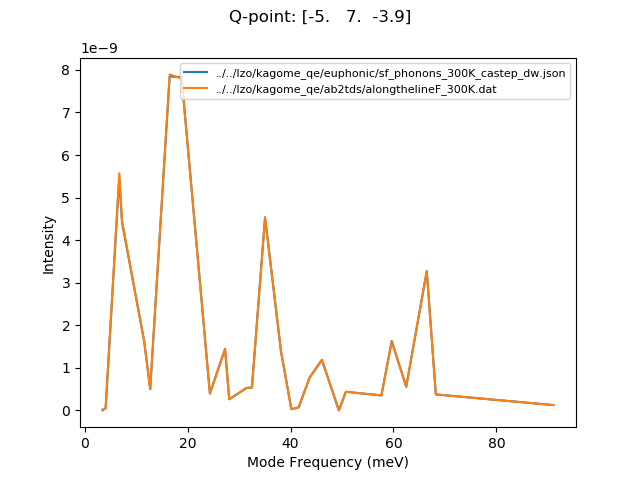

<IPython.core.display.Javascript object>


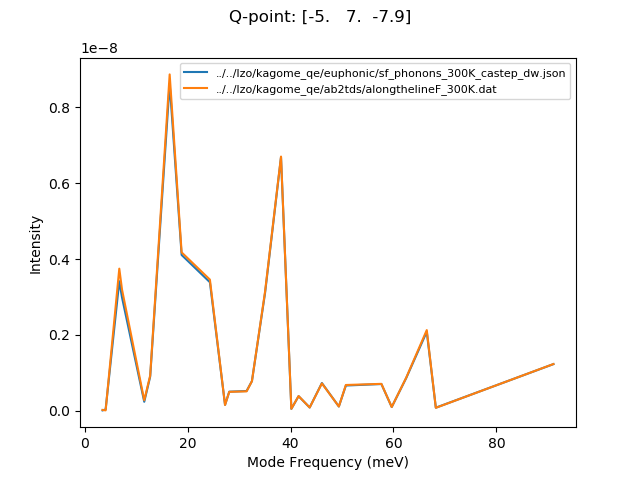

[]

In [17]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '39,79', '--mask-bragg'])

Overall the comparison between Euphonic and Ab2tds appears good, there are just some low-energy peaks that don't seem to compare exactly. If we do the same comparison with CASTEP-calculated and Euphonic-calculated phonon modes there is a similar discrepancy, suggesting that these modes are particularly sensitive to floating point differences (as these differences are seen even when the structure factor formulation is exactly the same):


Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 22342.044703203625 max: 28936275.700112574 min: 1.2999870328316215e-16
Relative Error - mean: 232450.27189997776 max: 124357086.34642911 min: 1.2810458557183225e-05


<IPython.core.display.Javascript object>


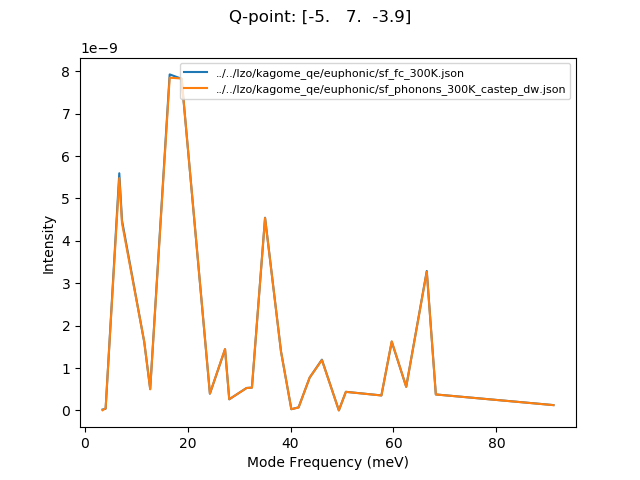

<IPython.core.display.Javascript object>


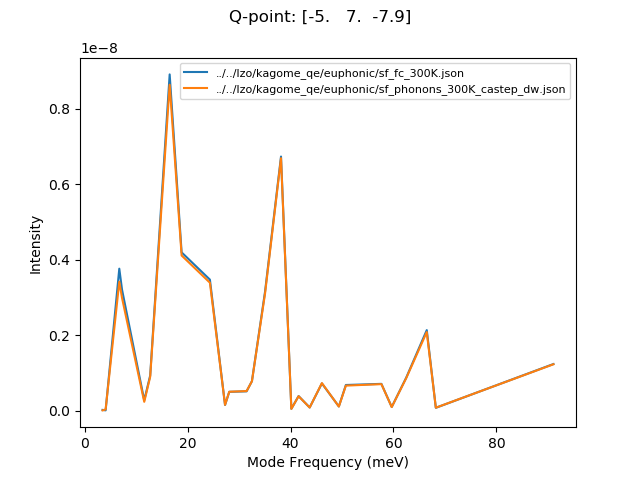

[]

In [18]:
%matplotlib notebook
compare_sf_main(['--sf2', '../../lzo/kagome_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf1', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json', '--qpts', '39,79'])

As a final sanity-check lets plot some of the highest-error points for quartz and Nb

**Quartz**

In [19]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat', '-n', '5'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K_castep_dw.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 1.8526880617142608e-07 max: 0.00035260651526766024 min: 1.415932266301473e-17
Relative Error - mean: 0.010490503477259482 max: 0.4262978975923891 min: 6.473824228726759e-07
Points with largest mean relative error: (array([177,   3,   1,   2, 194], dtype=int64), array([ 1,  9,  9,  9, 16], dtype=int64))


[]


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K_castep_dw.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 1.8526880617142608e-07 max: 0.00035260651526766024 min: 1.415932266301473e-17
Relative Error - mean: 0.010490503477259482 max: 0.4262978975923891 min: 6.473824228726759e-07
Points with largest mean relative error: (array([177,   3,   1,   2, 194], dtype=int64), array([ 1,  9,  9,  9, 16], dtype=int64))


<IPython.core.display.Javascript object>


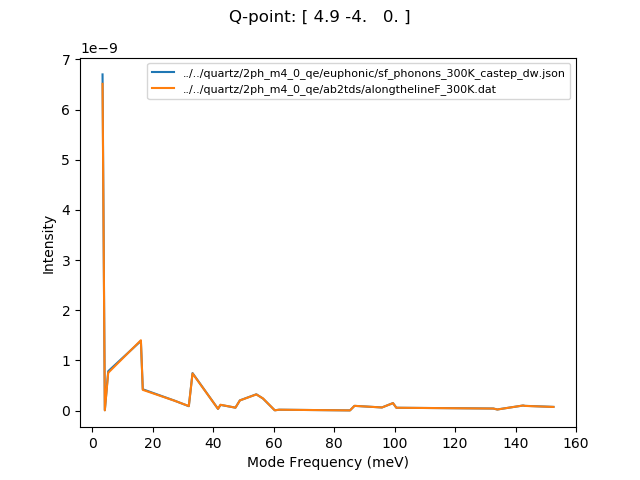

<IPython.core.display.Javascript object>


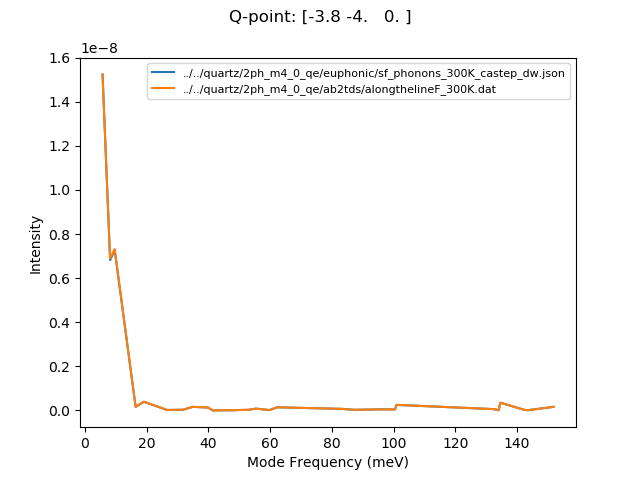

<IPython.core.display.Javascript object>


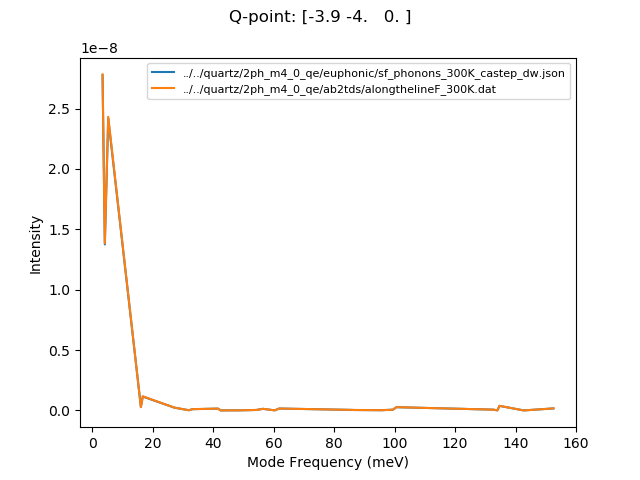

[]

In [12]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_300K.dat', '-n', '5', '--qpts', '177,3,1'])

**Nb**

In [22]:
%matplotlib notebook
compare_sf_main(['--sf2', '../../nb/m110_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf1', '../../nb/m110_qe/ab2tds/alongthelineF_300K.dat', '-n', '5'])


Results for ../../nb/m110_qe/ab2tds/alongthelineF_300K.dat ../../nb/m110_qe/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 26.576791194135755 max: 3056.086089912802 min: 3.9898613732108554e-08
Relative Error - mean: 0.0006618416442557501 max: 0.0014671194081154679 min: 2.7568549572283038e-05
Points with largest mean relative error: (array([40, 40, 40, 39, 39], dtype=int64), array([2, 1, 0, 2, 1], dtype=int64))


[]


Results for ../../nb/m110_qe/ab2tds/alongthelineF_300K.dat ../../nb/m110_qe/euphonic/sf_phonons_300K_castep_dw.json
Absolute Error - mean: 26.576791194135755 max: 3056.086089912802 min: 3.9898613732108554e-08
Relative Error - mean: 0.0006618416442557501 max: 0.0014671194081154679 min: 2.7568549572283038e-05


<IPython.core.display.Javascript object>


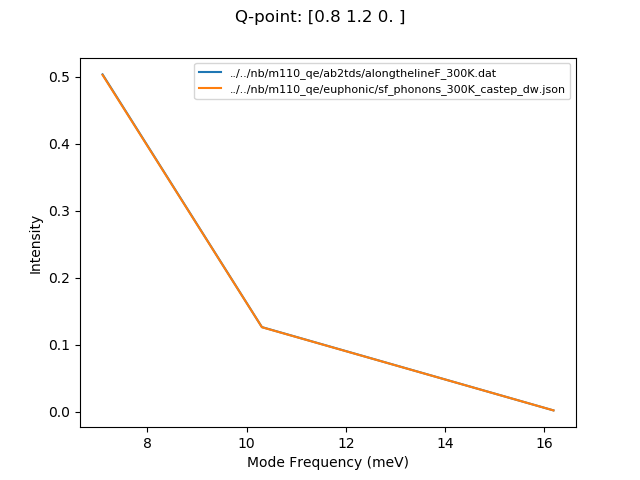

<IPython.core.display.Javascript object>


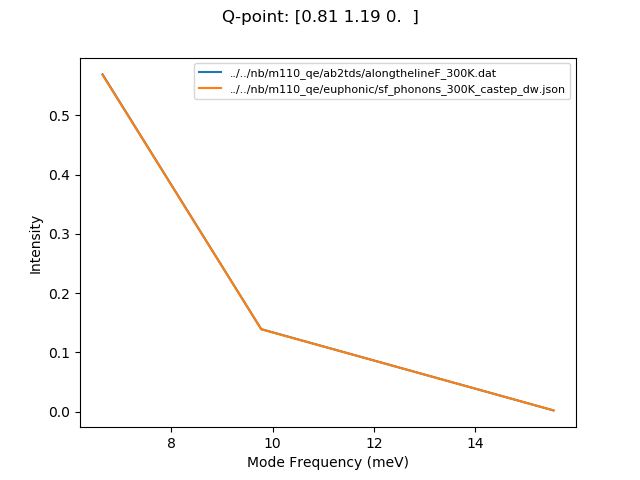

<IPython.core.display.Javascript object>


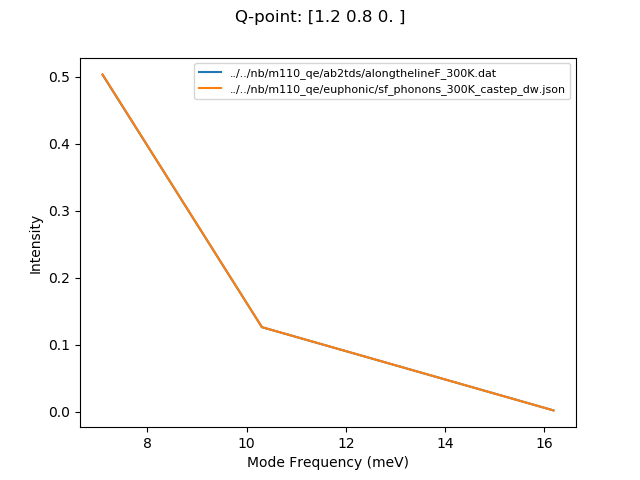

[]

In [23]:
%matplotlib notebook
compare_sf_main(['--sf2', '../../nb/m110_qe/euphonic/sf_phonons_300K_castep_dw.json',
                 '--sf1', '../../nb/m110_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '40,39,0'])